In [11]:
import numpy as np
from scipy.optimize import minimize

In [12]:
# Define function to minimize

def f(x):

    return (x[0] - 3) ** 2 + (x[1] - 2) ** 2

In [18]:
# Define the inequality constraint:
# 2x[0] + 3x[1] >= 13

def constraint_1(x):
    
    return 2 * x[0] + 3 * x[1] - 13

constraint = {'type': 'ineq', 'fun': constraint_1}

In [24]:
initial_guess = [2,3]

In [27]:
result = minimize(f, initial_guess, method='SLSQP', constraints=constraint)

print("Optimal x =", result.x)
print("Minimum f(x) =", result.fun)

Optimal x = [3.15384615 2.23076923]
Minimum f(x) = 0.07692307692307693


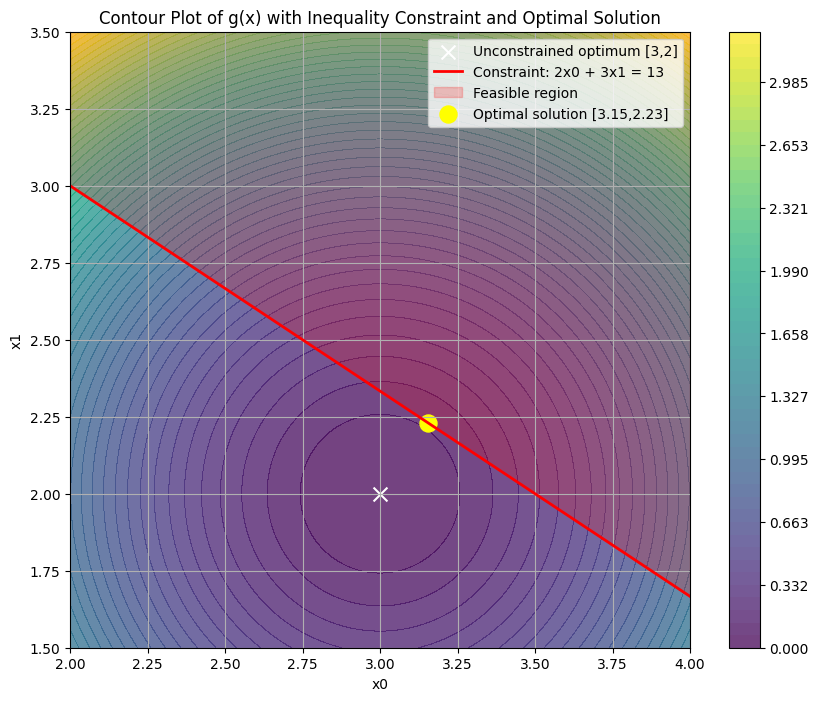

In [28]:
# Visualize the solution

import numpy as np
import matplotlib.pyplot as plt

# Define the function g(x) = (x0 - 3)^2 + (x1 - 2)^2
def g(x0, x1):
    return (x0 - 3)**2 + (x1 - 2)**2

# Create a grid of x0 and x1 values for plotting
x0_vals = np.linspace(2, 4, 400)
x1_vals = np.linspace(1.5, 3.5, 400)
X0, X1 = np.meshgrid(x0_vals, x1_vals)
G = g(X0, X1)

# Create the contour plot of g(x)
plt.figure(figsize=(10, 8))
levels = np.linspace(np.min(G), np.max(G), 50)
contour = plt.contourf(X0, X1, G, levels=levels, cmap='viridis', alpha=0.75)
plt.colorbar(contour)

# Plot the unconstrained optimum (for reference): [3, 2]
plt.scatter(3, 2, color='white', marker='x', s=100, label='Unconstrained optimum [3,2]')

# Plot the constraint boundary: 2x0 + 3x1 = 13
# Solve for x1 = (13 - 2*x0)/3
x0_line = np.linspace(2, 4, 100)
x1_line = (13 - 2 * x0_line) / 3
plt.plot(x0_line, x1_line, color='red', linewidth=2, label='Constraint: 2x0 + 3x1 = 13')

# Shade the feasible region: 2x0 + 3x1 >= 13
# We fill between the constraint line and the top of the plot region.
plt.fill_between(x0_line, x1_line, 3.5, color='red', alpha=0.2, label='Feasible region')

# Plot the optimal solution found (on the constraint boundary)
optimal_x0 = 3.15384615
optimal_x1 = 2.23076923
plt.scatter(optimal_x0, optimal_x1, color='yellow', marker='o', s=150, label='Optimal solution [3.15,2.23]')

plt.xlabel('x0')
plt.ylabel('x1')
plt.title('Contour Plot of g(x) with Inequality Constraint and Optimal Solution')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()
